## Extracting Data 

I used SQL to extract the data from the database and calculate the moving averages at the same time.

1. I filtered `city_list` to show me cities in my country using:
```SQL
select city from city_list
where country='Turkey'
```

2. I extracted global temperature data from `globa_data` using:
```SQL
select year, avg_temp as global_avg, ROUND(AVG(avg_temp) OVER (ORDER BY year ASC ROWS 9 PRECEDING), 2) AS global_ma10, ROUND(AVG(avg_temp) OVER (ORDER BY year ASC ROWS 24 PRECEDING), 2) AS global_ma25
from global_data
```

3. I did the same with `city_data` but only for the closest city which happens to be Istanbul:
```SQL
select year, avg_temp as city_avg, ROUND(AVG(avg_temp) OVER (ORDER BY year ASC ROWS 9 PRECEDING), 2) AS city_ma10, ROUND(AVG(avg_temp) OVER (ORDER BY year ASC ROWS 24 PRECEDING), 2) AS city_ma25
from city_data
where city='Istanbul'
```

## Loading data

The 2 tables are loaded and joined together using `Python` and `pandas`.

In [1]:
global_data_path = "datasets/weather_global_data.csv"
city_data_path = "datasets/weather_city_data.csv"

In [2]:
import pandas as pd

global_data = pd.read_csv(global_data_path)
city_data = pd.read_csv(city_data_path)
full_data = pd.merge(left=global_data,right=city_data, how='outer', left_on='year', right_on='year')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         273 non-null    int64  
 1   global_avg   266 non-null    float64
 2   global_ma10  266 non-null    float64
 3   global_ma25  266 non-null    float64
 4   city_avg     267 non-null    float64
 5   city_ma10    271 non-null    float64
 6   city_ma25    271 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


## Visualization

The dataframe containeing the full data is plotted using pandas' `plot` function, it uses `matplotlib` as its backend, which in turn is styled using `seaborn`.

We can ignore the earliest records for Istanbul, because we don't have global averages for the same years to compare them to.

The graph needs to fit all the dataand still be easy to read.

Text(0, 0.5, 'Average Temperature in ºC')

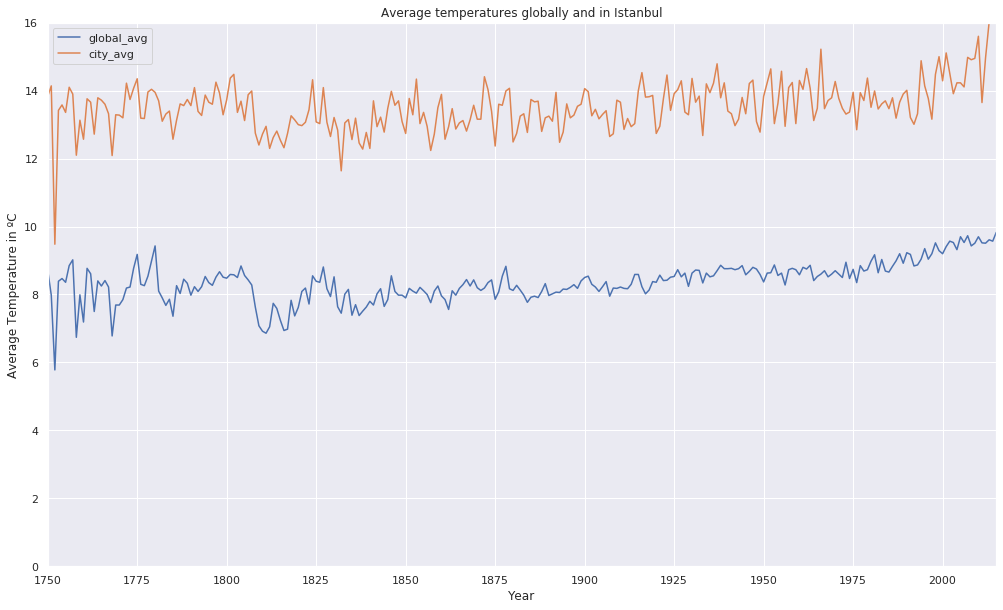

In [3]:
import seaborn as sns

sns.set()
ax1 = full_data[['year', 'global_avg', 'city_avg']].plot(x = 'year', title = 'Average temperatures globally and in Istanbul', figsize=(17,10), ylim=(0,16), xlim=(1750,2015), xticks=range(1750,2015,25))
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Temperature in ºC')

Text(0, 0.5, 'Average Temperature in ºC')

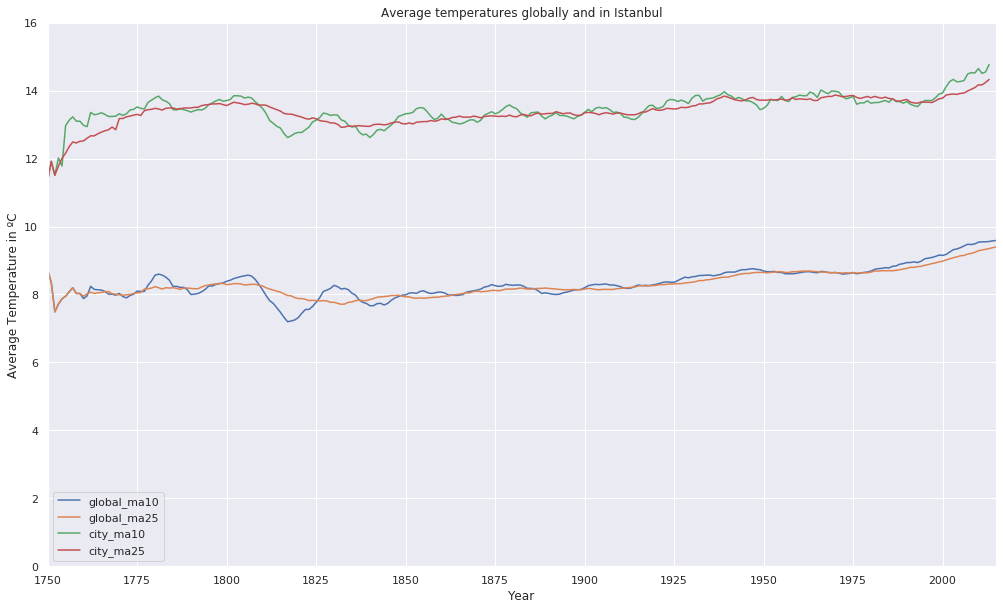

In [4]:
ax2 = full_data.drop(['global_avg', 'city_avg'], axis = 1).plot(x = 'year', title = 'Average temperatures globally and in Istanbul', figsize=(17,10), xlim=(1750,2015), ylim=(0,16), xticks=range(1750,2015,25))
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Temperature in ºC')

## Observations

- After 1850, average temperatures have been rising continuously both globally and in Istanbul
- This rise has accelerated after the year 1975 globally, and starting from around 1995 in Istanbul
- There is high corellation between recorded temperatures globally and in Istanbul
- Istanbul always maintaines a higher temperature than the global average with around 5 ºC.